In [3]:
import json

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

with open(
    "./data/yelp_academic_dataset_review.json", encoding="utf-8"
) as f:
    data = [json.loads(line) for line in f]
print(data.__class__)
print(data[0].keys())
print(data[0]["stars"])
print(data[1]["stars"])
# print(data)
texts = [d["text"] for d in data]
labels = [1 if d["stars"] >= 4 else 0 for d in data]  # 4-5星為正評，1-2星為負評
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)
print(len(X_train))
print(len(X_test))


<class 'list'>
dict_keys(['votes', 'user_id', 'review_id', 'stars', 'date', 'text', 'type', 'business_id'])
5
5
183925
45982


In [4]:
vocab_size = 10000
max_length = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(
    X_train_seq, maxlen=max_length, padding="post", truncating="post"
)
X_test_pad = pad_sequences(
    X_test_seq, maxlen=max_length, padding="post", truncating="post"
)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train_pad.shape)
print(X_test_pad.shape)


(183925, 200)
(45982, 200)


/home/chesterxalan/github/Classwork/Classwork-PythonAIIntegratedDevelopment/.venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1743303815.506890   18225 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1743303818.793693   18764 service.cc:152] XLA service 0x7f7af0014ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743303818.793733   18764 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-03-30 11:03:38.832809: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743303819.079488   18764 cuda_dnn.cc:529] Loaded cuDNN version 90300


   3/2874 ━━━━━━━━━━━━━━━━━━━━ 2:14 47ms/step - accuracy: 0.4948 - loss: 0.6861 

I0000 00:00:1743303820.680480   18764 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2874/2874 ━━━━━━━━━━━━━━━━━━━━ 126s 43ms/step - accuracy: 0.6776 - loss: 0.6254 - val_accuracy: 0.6795 - val_loss: 0.6266
Epoch 2/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 114s 40ms/step - accuracy: 0.6887 - loss: 0.6168 - val_accuracy: 0.6776 - val_loss: 0.6237
Epoch 3/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 117s 41ms/step - accuracy: 0.6834 - loss: 0.6185 - val_accuracy: 0.6848 - val_loss: 0.6149
Epoch 4/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 118s 41ms/step - accuracy: 0.6941 - loss: 0.6039 - val_accuracy: 0.6912 - val_loss: 0.6045
Epoch 5/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 118s 41ms/step - accuracy: 0.7000 - loss: 0.5978 - val_accuracy: 0.6918 - val_loss: 0.6082
Epoch 6/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 118s 41ms/step - accuracy: 0.7008 - loss: 0.5947 - val_accuracy: 0.6797 - val_loss: 0.6123
Epoch 7/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 119s 42ms/step - accuracy: 0.7018 - loss: 0.5922 - val_accuracy: 0.6948 - val_loss: 0.6073
Epoch 8/10
2874/2874 ━━━━━━━━━━━━━━━━━━━━ 113s 39ms/step - accuracy: 0.7074 - lo

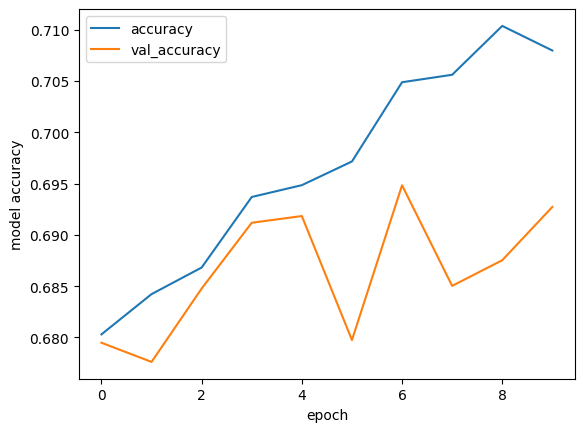

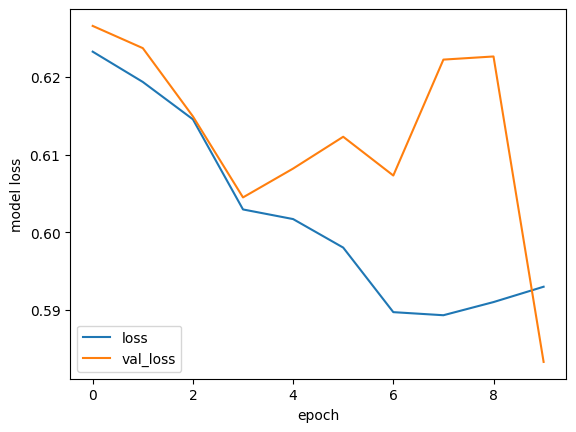

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
正評
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
正評


In [5]:
# 模型規劃與編譯 ->後續會做替換
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, 64, input_length=max_length),
        tf.keras.layers.SimpleRNN(64, return_sequences=False),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

# 訓練與圖表顯示
epochs = 10
batch_size = 64
history = model.fit(
    X_train_pad,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_pad, y_test),
)
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.ylabel("model accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.ylabel("model loss")
plt.xlabel("epoch")
plt.legend()
plt.show()


# 預測
def predict_review(text):
    seq = tokenizer.texts_to_sequences([text])
    pad_seq = pad_sequences(seq, maxlen=max_length, padding="post", truncating="post")
    prediction = model.predict(pad_seq)
    return "正評" if prediction[0][0] > 0.5 else "負評"


print(predict_review("The food was terrible, I will never come back!"))
print(predict_review("Amazing experience, the staff was very friendly."))
